In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
print(gpus)
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

import mlflow
import mlflow.tensorflow
from scipy.stats import wasserstein_distance

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import DataGenerator
tr_size = 3e7
data_generator = DataGenerator.DataGenerator('../data/a1TrainGenerator.hdf5',batch_size=int(tr_size))
g = data_generator.generator()

In [3]:
train_data = next(g)
temp = next(g)
rows = np.random.randint(0,temp[0].shape[0],size=int(tr_size/200))
val_data = (temp[0][rows,:],temp[1][rows,:])
temp = next(g)
rows = np.random.randint(0,temp[0].shape[0],size=int(tr_size/20))
test_data = (temp[0][rows,:],temp[1][rows,:])
del temp

In [4]:
mlflow.set_tracking_uri('../mlruns')

In [5]:
params = {}
params['layer_sizes'] = [1024,2048,2048,2048]
params['activation_f'] = 'selu'
params['dropout_val'] = .01
params['l1_val'] = 1e-5
params['l2_val'] = 1e-4

input_l = K.layers.Input(6)
x = input_l
for i in params['layer_sizes']:
    x = K.layers.Dense(
        i,
        activation=params['activation_f'],
        kernel_regularizer=K.regularizers.l1_l2(l1=params['l1_val'], l2=params['l2_val']),
        bias_regularizer=K.regularizers.l2(params['l2_val']))(x)
    x = K.layers.Dropout(params['dropout_val'])(x)

x = K.layers.Dense(1,activation='sigmoid')(x)
model = K.models.Model(input_l, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7168      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0     

In [6]:
model.compile(loss=K.losses.binary_crossentropy,
                    optimizer='adam',
                    metrics=['accuracy'])

In [7]:
experiment_name = "Filter_002"
mlflow.set_experiment(experiment_name)
epoch = 0
with mlflow.start_run():
    for i in params.keys():
        mlflow.log_param(i, params[i])
    mlflow.tensorflow.autolog()
    for epoch in range(6):
        model.fit(x=train_data[0],y=train_data[1],validation_data=val_data,epochs=1,batch_size=1024*16)
        model.save(f'filter_epoch_{epoch:02d}.h5')
        del train_data
        train_data = next(g)
mlflow.end_run()

2021-08-07 18:06:48.399912: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES


   1/1832 [..............................] - ETA: 1:15:56 - loss: 3.4036 - accuracy: 0.4748

2021-08-07 18:06:51.595688: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES


1832/1832 [==============================] - 719s 391ms/step - loss: 0.6828 - accuracy: 0.9965 - val_loss: 0.0179 - val_accuracy: 0.9992
INFO:tensorflow:Assets written to: /tmp/tmp7ea5tk6c/model/data/model/assets


2021-08-07 18:18:52.925822: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


   1/1832 [..............................] - ETA: 53:53 - loss: 0.0188 - accuracy: 0.9988

2021-08-07 18:18:55.348549: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


1832/1832 [==============================] - 716s 390ms/step - loss: 0.0139 - accuracy: 0.9990 - val_loss: 0.0134 - val_accuracy: 0.9985
INFO:tensorflow:Assets written to: /tmp/tmpwg7q1y9m/model/data/model/assets


2021-08-07 18:30:54.121837: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


   1/1832 [..............................] - ETA: 54:37 - loss: 0.0125 - accuracy: 0.9987

2021-08-07 18:30:56.573781: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


1832/1832 [==============================] - 690s 376ms/step - loss: 0.0127 - accuracy: 0.9991 - val_loss: 0.0125 - val_accuracy: 0.9993
INFO:tensorflow:Assets written to: /tmp/tmpjxchyn7x/model/data/model/assets


2021-08-07 18:42:29.286065: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


   1/1832 [..............................] - ETA: 52:42 - loss: 0.0119 - accuracy: 0.9995

2021-08-07 18:42:31.670750: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


1832/1832 [==============================] - 672s 366ms/step - loss: 0.0138 - accuracy: 0.9992 - val_loss: 0.0151 - val_accuracy: 0.9990
INFO:tensorflow:Assets written to: /tmp/tmpw9e6tqta/model/data/model/assets


2021-08-07 18:53:46.798686: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


   1/1832 [..............................] - ETA: 52:28 - loss: 0.0165 - accuracy: 0.9984

2021-08-07 18:53:49.180861: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


1832/1832 [==============================] - 671s 366ms/step - loss: 0.0154 - accuracy: 0.9992 - val_loss: 0.0161 - val_accuracy: 0.9990
INFO:tensorflow:Assets written to: /tmp/tmpnb_96ug9/model/data/model/assets


2021-08-07 19:05:03.264268: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


   1/1832 [..............................] - ETA: 52:35 - loss: 0.0169 - accuracy: 0.9990

2021-08-07 19:05:05.642830: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


1832/1832 [==============================] - 672s 366ms/step - loss: 0.0160 - accuracy: 0.9992 - val_loss: 0.0157 - val_accuracy: 0.9993
INFO:tensorflow:Assets written to: /tmp/tmpoybmssj5/model/data/model/assets


In [7]:
model = K.models.load_model('filter_epoch_05.h5')

In [8]:
true_particles = model.predict(test_data[0][test_data[1].astype('bool').flatten()])
fake_particles = model.predict(test_data[0][~test_data[1].astype('bool').flatten()])

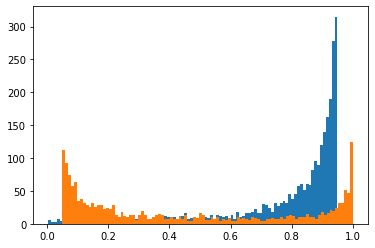

In [9]:
plt.hist(true_particles[true_particles<.95],bins=100)
plt.hist(fake_particles[fake_particles>0.05],bins=100)
plt.show()

In [8]:
import torch
G = mlflow.pytorch.load_model('/home/przemek/Desktop/engineering-thesis/mlruns/1/0a6f4a7b673a4246a69451af81efedc8/artifacts/Ge_2')
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = int(5e4)
n_noise = 512

In [15]:
import time
generated_p = np.array([[0,0,0,0,0,0]])

while generated_p.shape[0]<1e6:
    x = torch.randn(batch_size, n_noise).to(DEVICE)
    generated_part_torch = G(x).detach().to('cpu').numpy()

    predictions = model.predict(generated_part_torch).flatten()
    mask = np.greater(predictions.flatten(),0.9999)
    temp = np.concatenate([generated_p,generated_part_torch[mask,:]])
    generated_p = temp
    print(f"{int(time.time())%100:02d} - Particles {generated_p.shape[0]}",end='\r')

In [16]:
import itertools
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

In [17]:
comb = [x for x in powerset([0,1,2,3,4,5]) if len(x)==2]
len(comb)
keys = ['E', 'X', 'Y', 'dX', 'dY', 'dZ']

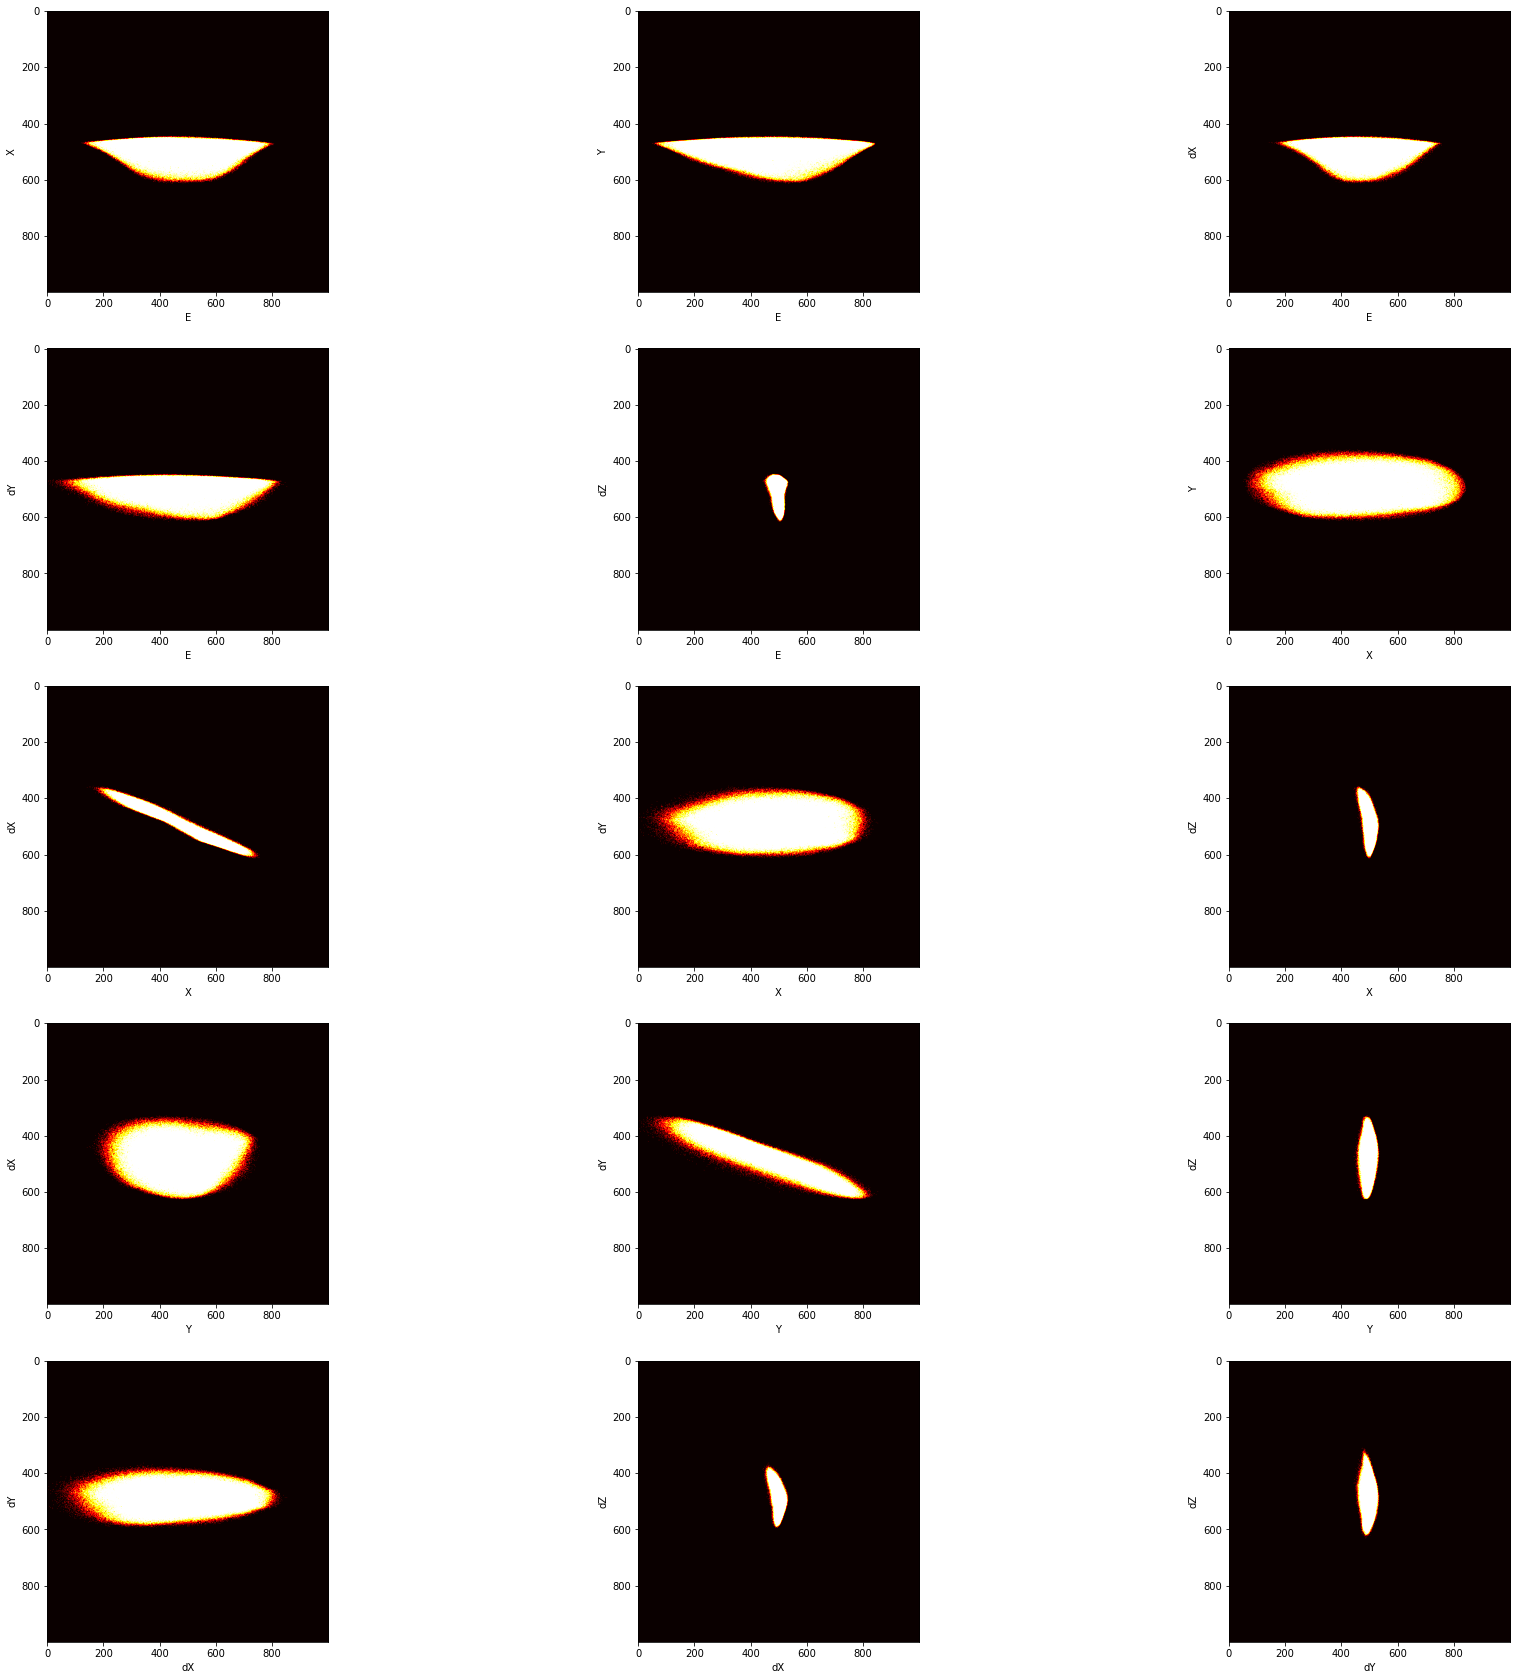

In [18]:
fig,axs = plt.subplots(5,3)
fig.set_size_inches((30,30))
for k,(i,j) in enumerate(comb):
    temp = np.histogramdd(generated_p[:,[i,j]],bins=[1000,1000],range=[[-8,8],[-3,3]])
    temp_im = np.tanh(temp[0])
    #temp_im = temp
    axs.flatten()[k].imshow(temp_im,cmap='hot')
    axs.flatten()[k].set_xlabel(keys[i])
    axs.flatten()[k].set_ylabel(keys[j])

In [ ]:
experiment_name = "Filter_003_learning_with_pytorch_model"
mlflow.set_experiment(experiment_name)
epoch = 0
batch_size=10000
with mlflow.start_run():
    for i in params.keys():
        mlflow.log_param(i, params[i])
    mlflow.tensorflow.autolog()
    for epoch in range(3):
        generated_p = np.array([[0,0,0,0,0,0]])
        print('generating fake particles')
        while generated_p.shape[0]<data_generator.fake_size+2:
            x = torch.randn(batch_size, n_noise).to(DEVICE)
            generated_part_torch = G(x).detach().to('cpu').numpy()
            temp = np.concatenate([generated_p,generated_part_torch])
            generated_p = temp
        generated_p = generated_p[1:data_generator.fake_size+1]
        print('generation completed')
        x = train_data[0]
        y = train_data[1]
        x[y.flatten()==0]=generated_p
        model.fit(x=x,y=y,validation_data=val_data,epochs=1,batch_size=1024)
        model.save(f'filter_epoch_torch_{epoch:02d}.h5')
        del train_data, x, y
        train_data = next(g)
mlflow.end_run()

In [16]:
model.save(f'filter_epoch_torch_01.h5')

In [17]:
import time
generated_p = np.array([[0,0,0,0,0,0]])
batch_size=100000
while generated_p.shape[0]<1e6:
    x = torch.randn(batch_size, n_noise).to(DEVICE)
    generated_part_torch = G(x).detach().to('cpu').numpy()

    predictions = model.predict(generated_part_torch).flatten()
    mask = np.greater(predictions.flatten(),0.5)
    temp = np.concatenate([generated_p,generated_part_torch[mask,:]])
    generated_p = temp
    print(f"{int(time.time())%100:02d} - Particles {generated_p.shape[0]}",end='\r')

In [18]:
import itertools
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

comb = [x for x in powerset([0,1,2,3,4,5]) if len(x)==2]
len(comb)
keys = ['E', 'X', 'Y', 'dX', 'dY', 'dZ']

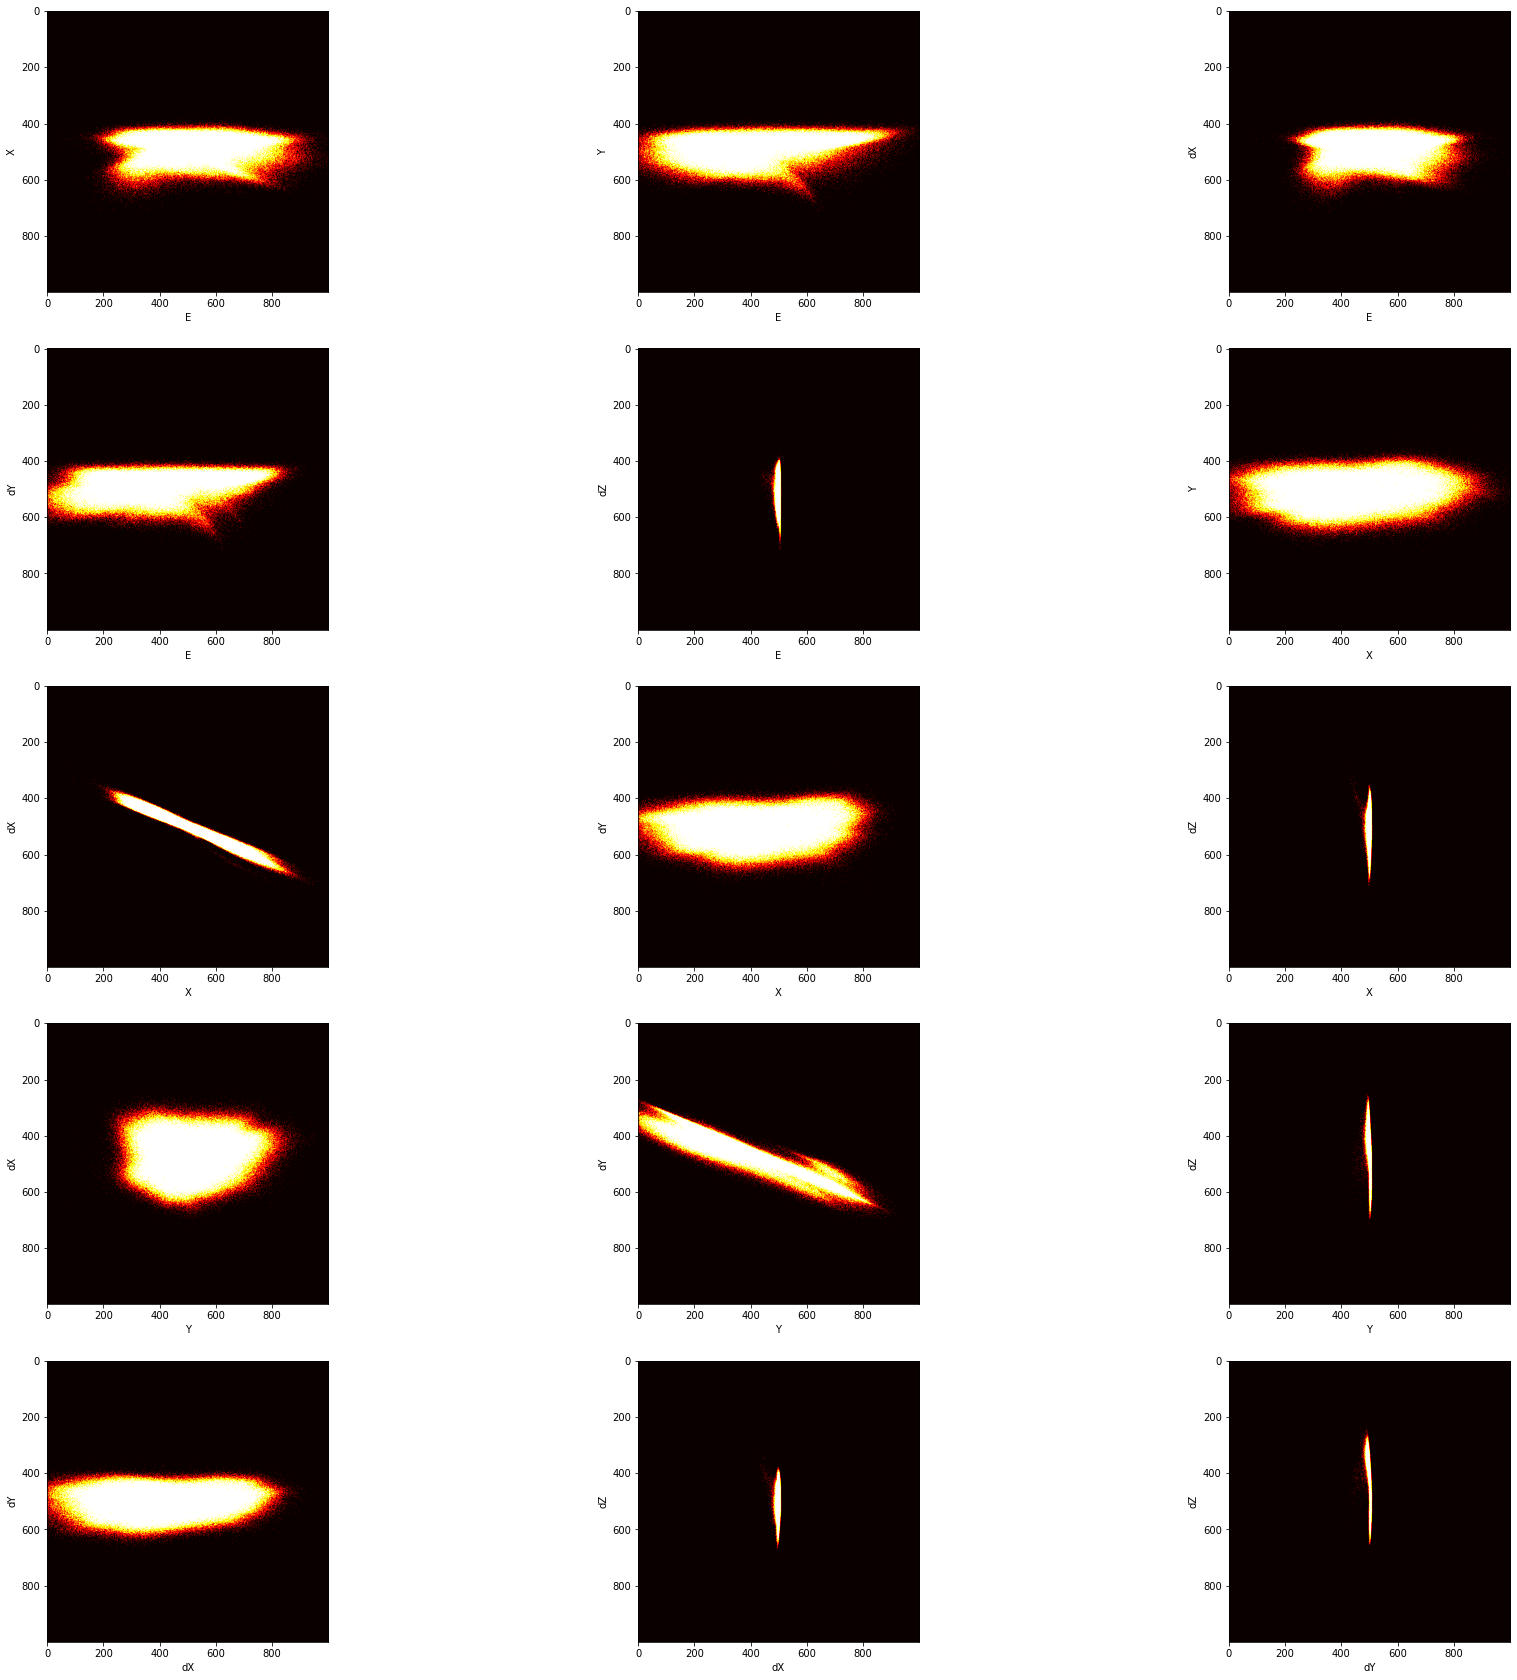

In [19]:
fig,axs = plt.subplots(5,3)
fig.set_size_inches((30,30))
for k,(i,j) in enumerate(comb):
    temp = np.histogramdd(generated_p[:,[i,j]],bins=[1000,1000],range=[[-8,8],[-3,3]])
    temp_im = np.tanh(temp[0])
    #temp_im = temp
    axs.flatten()[k].imshow(temp_im,cmap='hot')
    axs.flatten()[k].set_xlabel(keys[i])
    axs.flatten()[k].set_ylabel(keys[j])